In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df=pd.read_csv("fake_reg-Copy1.csv")

In [7]:
df

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531
...,...,...,...
995,476.526078,1000.018988,999.672732
996,457.313186,998.855379,1000.020026
997,456.720992,1001.451646,998.847606
998,403.315576,1000.771023,998.562851


In [8]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [9]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


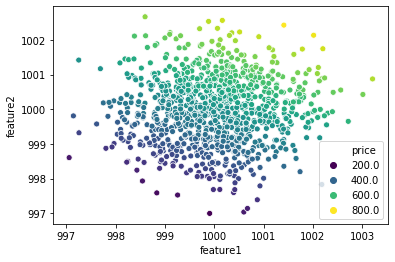

In [10]:
sns.scatterplot(data=df,x="feature1",y="feature2",hue="price",palette="viridis") # as we can see this thing is directly related to fetaure 2

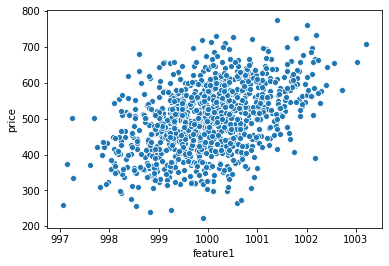

In [11]:
sns.scatterplot(data=df,x="feature1",y="price") # relation with feature 1 isnt that impressive/correlated

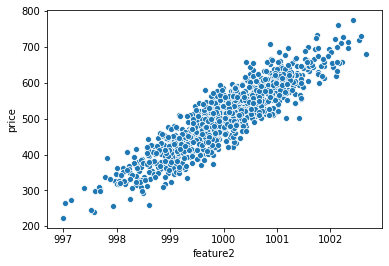

In [12]:
sns.scatterplot(data=df,x="feature2",y="price") #feature 2 and price are correlated

## hamesha neural network ke model mai sirf values jaega so sirf values use

In [15]:
from sklearn.model_selection import train_test_split
X=df[["feature1","feature2"]].values
y=df["price"].values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [28]:
from sklearn.preprocessing import MinMaxScaler # scales everything in the range 0,1 unlike standard scaler where it is
#scaled to a min negatiev to positive values but not within a specified range also min max scaler doesnt convert our data 
#into a uniform distribution with the mean being at the centre or 0 like standard scaler..the min value gets assigned as 0 and
#the max value in that col gets assigned as 1

In [29]:
scale=MinMaxScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)


In [30]:
from tensorflow.keras.models import Sequential # jo bhi capital mai imported uska pehle obj create

In [31]:
from tensorflow.keras.layers import Dense  # dense is a hidden layer where every neuron is connected to every previous neuron
#like a full fledged neural net we can have diffrent types of layer configurations 

In [32]:
base_mod=Sequential(layers=[Dense(4,activation="relu"),Dense(3,activation="relu"),Dense(2,activation="relu"),Dense(1,activation="relu")])

### here we created Dense object which is a single hidden layer and passed all the hidden layer inside that list.method 2 is below

In [33]:
base_mod=Sequential()

In [34]:
base_mod.add(Dense(4,activation="relu"))

In [35]:
base_mod.add(Dense(4,activation="relu"))

In [36]:
base_mod.add(Dense(4,activation="relu"))

In [37]:
base_mod.add(Dense(1)) # last wale ka activation function hata diya ..cause mujhe nhi chahiye ..last wasla sirf output want 

## this method is superior cause we can make functions to add multiple layers for us and we can also remove any layer directly when required

In [38]:
base_mod.compile(optimizer='rmsprop',loss='mse') # this step is to mention how would be want to update weights with which method and how to
#evakuate performance on what metrics and  which losss function to use in the optimizer

In [39]:
base_mod.fit(X_train,y_train,epochs=300) # verbose is jitna  bhi iteration ho rha uska kitna you want to show
# epochs is same data kitne baar input dena hai ya basically kitne baar weights update karna hai

Train on 750 samples
Epoch 1/300
750/750 [==============================] - 1s 2ms/sample - loss: 257387.8927
Epoch 2/300
750/750 [==============================] - 0s 70us/sample - loss: 257352.4041
Epoch 3/300
750/750 [==============================] - 0s 72us/sample - loss: 257314.7666
Epoch 4/300
750/750 [==============================] - 0s 64us/sample - loss: 257267.7835
Epoch 5/300
750/750 [==============================] - 0s 61us/sample - loss: 257211.0686
Epoch 6/300
750/750 [==============================] - 0s 69us/sample - loss: 257143.5070
Epoch 7/300
750/750 [==============================] - 0s 61us/sample - loss: 257064.0908
Epoch 8/300
750/750 [==============================] - 0s 60us/sample - loss: 256971.7352
Epoch 9/300
750/750 [==============================] - 0s 69us/sample - loss: 256864.5273
Epoch 10/300
750/750 [==============================] - 0s 64us/sample - loss: 256740.0078
Epoch 11/300
750/750 [==============================] - 0s 59us/sample - loss: 

750/750 [==============================] - 0s 68us/sample - loss: 6686.8669
Epoch 92/300
750/750 [==============================] - 0s 63us/sample - loss: 5175.9150
Epoch 93/300
750/750 [==============================] - 0s 61us/sample - loss: 4133.8286
Epoch 94/300
750/750 [==============================] - 0s 59us/sample - loss: 3598.1806
Epoch 95/300
750/750 [==============================] - 0s 60us/sample - loss: 3437.5306
Epoch 96/300
750/750 [==============================] - 0s 64us/sample - loss: 3366.3309
Epoch 97/300
750/750 [==============================] - 0s 62us/sample - loss: 3322.6079
Epoch 98/300
750/750 [==============================] - 0s 64us/sample - loss: 3283.6263
Epoch 99/300
750/750 [==============================] - 0s 62us/sample - loss: 3244.5612
Epoch 100/300
750/750 [==============================] - 0s 66us/sample - loss: 3203.3982
Epoch 101/300
750/750 [==============================] - 0s 69us/sample - loss: 3163.9798
Epoch 102/300
750/750 [=========

750/750 [==============================] - 0s 92us/sample - loss: 604.0827
Epoch 183/300
750/750 [==============================] - 0s 82us/sample - loss: 584.8040
Epoch 184/300
750/750 [==============================] - 0s 63us/sample - loss: 563.8778
Epoch 185/300
750/750 [==============================] - 0s 70us/sample - loss: 545.2968
Epoch 186/300
750/750 [==============================] - 0s 73us/sample - loss: 525.2228
Epoch 187/300
750/750 [==============================] - 0s 69us/sample - loss: 506.8744
Epoch 188/300
750/750 [==============================] - 0s 66us/sample - loss: 489.3899
Epoch 189/300
750/750 [==============================] - 0s 78us/sample - loss: 471.7702
Epoch 190/300
750/750 [==============================] - 0s 72us/sample - loss: 452.6572
Epoch 191/300
750/750 [==============================] - 0s 60us/sample - loss: 435.2904
Epoch 192/300
750/750 [==============================] - 0s 60us/sample - loss: 415.1993
Epoch 193/300
750/750 [============

750/750 [==============================] - 0s 70us/sample - loss: 23.7590
Epoch 275/300
750/750 [==============================] - 0s 78us/sample - loss: 23.5218
Epoch 276/300
750/750 [==============================] - 0s 73us/sample - loss: 23.5597
Epoch 277/300
750/750 [==============================] - 0s 65us/sample - loss: 23.8396
Epoch 278/300
750/750 [==============================] - 0s 69us/sample - loss: 23.6262
Epoch 279/300
750/750 [==============================] - 0s 69us/sample - loss: 23.5924
Epoch 280/300
750/750 [==============================] - 0s 64us/sample - loss: 23.4637
Epoch 281/300
750/750 [==============================] - 0s 80us/sample - loss: 23.6385
Epoch 282/300
750/750 [==============================] - 0s 72us/sample - loss: 23.5936
Epoch 283/300
750/750 [==============================] - 0s 69us/sample - loss: 23.4554
Epoch 284/300
750/750 [==============================] - 0s 68us/sample - loss: 23.6227
Epoch 285/300
750/750 [=======================

In [44]:
pred=base_mod.predict(X_test)

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [46]:
mean_absolute_error(y_test,pred)

4.260257596010773

In [47]:
np.sqrt(mean_squared_error(y_test,pred))

5.367515584926924

In [48]:
pred.shape

(250, 1)

In [49]:
y_test.shape

(250,)

In [50]:
pred=pred.reshape(250,)

In [51]:
pred.shape

(250,)

In [52]:
y_test-pred
x=np.arange(0,250)

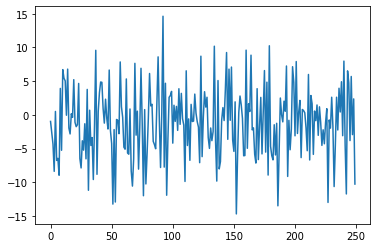

In [53]:
plt.plot(x,y_test-pred) # on an average its closer to 0

In [54]:
base_mod.history.history  # gives a dict of loss values

{'loss': [257387.89275,
  257352.40408333333,
  257314.76658333334,
  257267.7835,
  257211.068625,
  257143.507,
  257064.09079166668,
  256971.73525,
  256864.52733333333,
  256740.00783333334,
  256595.09070833333,
  256427.49891666666,
  256232.08729166666,
  256005.54279166667,
  255744.628625,
  255446.783875,
  255111.39558333333,
  254734.610625,
  254315.27258333334,
  253848.04466666665,
  253333.50508333332,
  252765.75025,
  252143.03025,
  251461.75470833332,
  250721.65720833334,
  249911.56341666667,
  249031.87425,
  248083.80420833334,
  247057.428625,
  245954.22808333332,
  244765.39854166665,
  243491.83016666668,
  242120.76716666666,
  240665.84183333334,
  239106.90191666665,
  237457.62358333333,
  235696.58354166665,
  233827.93133333334,
  231850.66075,
  229767.76554166665,
  227570.44491666666,
  225236.67541666667,
  222774.70658333335,
  220206.68829166668,
  217497.52108333333,
  214660.515375,
  211697.72154166666,
  208588.16079166665,
  205362.23795833

In [55]:
base_mod.history.history['loss']

[257387.89275,
 257352.40408333333,
 257314.76658333334,
 257267.7835,
 257211.068625,
 257143.507,
 257064.09079166668,
 256971.73525,
 256864.52733333333,
 256740.00783333334,
 256595.09070833333,
 256427.49891666666,
 256232.08729166666,
 256005.54279166667,
 255744.628625,
 255446.783875,
 255111.39558333333,
 254734.610625,
 254315.27258333334,
 253848.04466666665,
 253333.50508333332,
 252765.75025,
 252143.03025,
 251461.75470833332,
 250721.65720833334,
 249911.56341666667,
 249031.87425,
 248083.80420833334,
 247057.428625,
 245954.22808333332,
 244765.39854166665,
 243491.83016666668,
 242120.76716666666,
 240665.84183333334,
 239106.90191666665,
 237457.62358333333,
 235696.58354166665,
 233827.93133333334,
 231850.66075,
 229767.76554166665,
 227570.44491666666,
 225236.67541666667,
 222774.70658333335,
 220206.68829166668,
 217497.52108333333,
 214660.515375,
 211697.72154166666,
 208588.16079166665,
 205362.23795833334,
 201985.66941666667,
 198450.19991666666,
 194790.15

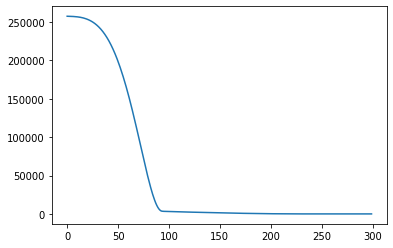

In [56]:
plt.plot(np.arange(0,300),base_mod.history.history['loss'])  # x must the same as no of epochs

In [57]:
test_data=[[995,1000]]

In [58]:
test_data=scale.transform(test_data)

In [59]:
base_mod.predict(test_data)

array([[749009.44]], dtype=float32)

In [60]:
from tensorflow.keras.models import load_model

In [61]:
base_mod.save('first_keras.tf')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: first_keras.tf\assets


In [62]:
loaded_mod=load_model(filepath='first_keras.tf') ## save saves the all the previous weights the optimizer chose and the moddel

#isntances with its given arguments stuctures bias and weights

In [63]:
loaded_mod.predict(test_data)

array([[749009.44]], dtype=float32)